<a href="https://colab.research.google.com/github/dawon-oh/Codestates-Project/blob/main/AI_01_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**다음 분기 어떤 게임을 설계할 것인가?**


# 데이터 전처리

In [1]:
# 데이터 불러오기 

import pandas as pd

data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [3]:
# 결측치 제거 
df = data.dropna()
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
# Year 전처리

def trans(x):
  if x < 21:
    x = x + 2000
  elif (x >= 21) & (x < 99):
    x = x + 1900
  else:
    x
  return x

In [6]:
df['Year'] = df['Year'].apply(trans)

In [7]:
df['Year'] = df['Year'].astype(int)
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [8]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
# Sales 전처리 

def sales(x):
  if x[-1] == 'K':
    x = x.strip('K')
    x = pd.to_numeric(x)/1000
  elif x[-1] == 'M':
    x = x.strip('M')
    x = pd.to_numeric(x)
  else:
    x = pd.to_numeric(x)
  return x

In [10]:
df['NA_Sales'] = df['NA_Sales'].apply(sales)
df['EU_Sales'] = df['EU_Sales'].apply(sales)
df['JP_Sales'] = df['JP_Sales'].apply(sales)
df['Other_Sales'] = df['Other_Sales'].apply(sales)

In [11]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
df = df.sort_values(by=['Year'], axis=0) # 연도 기준 오름차순 정렬 
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00


# 지역별 선호하는 게임 

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# 국가별 sales 총합 
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64

In [15]:
# 지역별 장르 Sales sum

genre_sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_sales_sum = genre_sales.groupby('Genre').sum().reset_index()
genre_sales_sum

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


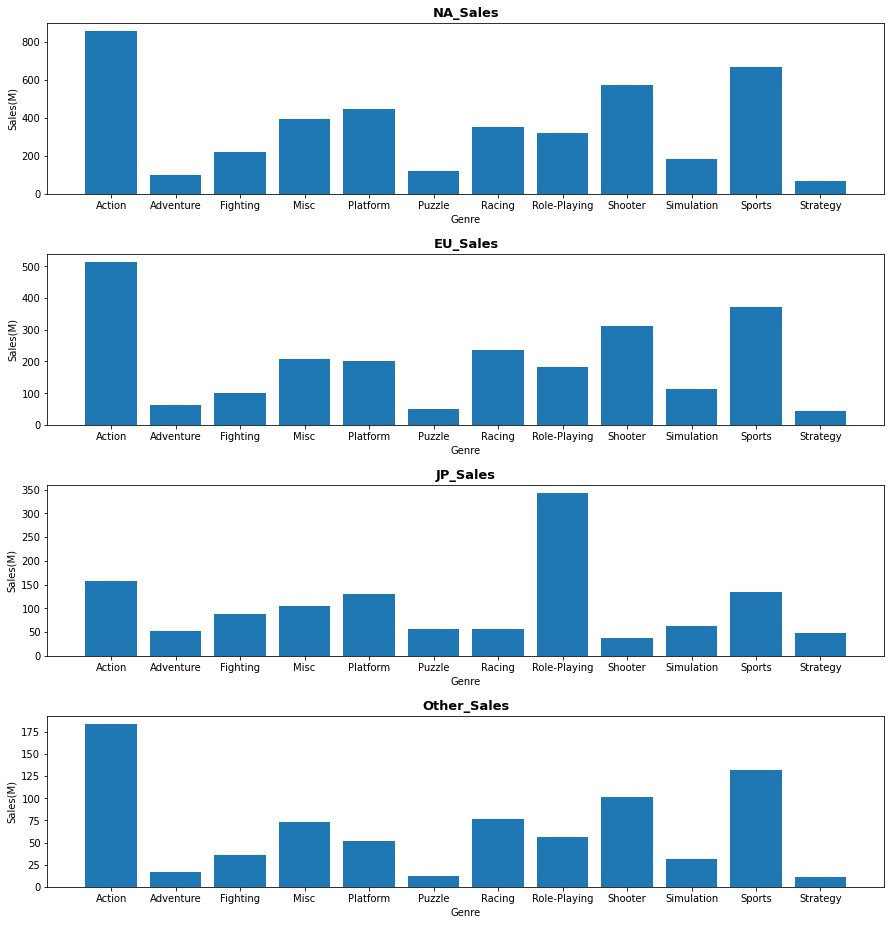

In [17]:
# 국가별 게임장르 매출액 합 


plt.figure(figsize = (15, 15))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(411)
plt.bar(genre_sales_sum['Genre'], genre_sales_sum['NA_Sales'])
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Sales(M)', fontsize = 10)
plt.title('NA_Sales', fontsize = 13, fontweight = 'bold')

plt.subplot(412)
plt.bar(genre_sales_sum['Genre'], genre_sales_sum['EU_Sales'])
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Sales(M)', fontsize = 10)
plt.title('EU_Sales', fontsize = 13, fontweight = 'bold')

plt.subplot(413)
plt.bar(genre_sales_sum['Genre'], genre_sales_sum['JP_Sales'])
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Sales(M)', fontsize = 10)
plt.title('JP_Sales', fontsize = 13, fontweight = 'bold')

plt.subplot(414)
plt.bar(genre_sales_sum['Genre'], genre_sales_sum['Other_Sales'])
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Sales(M)', fontsize = 10)
plt.title('Other_Sales', fontsize = 13, fontweight = 'bold')

plt.show()

선호도를 매출을 기준으로 분석했을때

북미와 유럽, 그 외 지역은 Action 장르에 대한 선호도가 높으며 

일본은 Role-Playing 장르에 대한 선호도가 높다. 

# 연도별 게임의 트렌드

In [18]:
# 연도별 장르의 sales

year_genre_sales = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
year_genre_sales['Sales_Sum'] = year_genre_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
year_genre_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,1980,Fighting,0.72,0.04,0.00,0.01,0.77
1,1980,Shooter,4.00,0.26,0.00,0.05,4.31
2,1980,Shooter,2.56,0.17,0.00,0.03,2.76
3,1980,Misc,0.25,0.02,0.00,0.00,0.27
4,1980,Action,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...
16236,2016,Sports,0.00,0.00,0.11,0.00,0.11
16237,2017,Role-Playing,0.00,0.00,0.03,0.00,0.03
16238,2017,Action,0.00,0.00,0.01,0.00,0.01
16239,2017,Role-Playing,0.00,0.00,0.01,0.00,0.01


In [19]:
year_genre_sales['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [20]:
# 연도별 장르의 sales sum

df_ygs = year_genre_sales.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df_ygs = df_ygs.groupby(['Year', 'Genre'], as_index = False).sum()
df_ygs

,Year,Genre,Sales_Sum
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


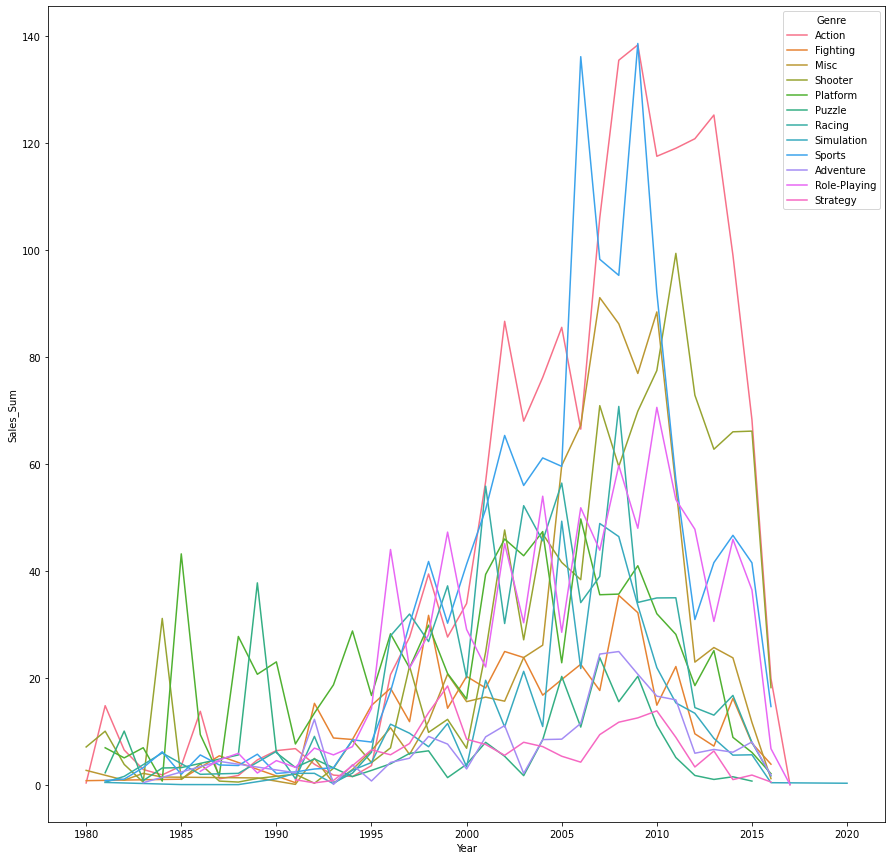

In [21]:
# 장르의 연도별 추세 

plt.figure(figsize = (15, 15))
sns.lineplot(x = 'Year', y = 'Sales_Sum', hue = 'Genre', data = df_ygs)
plt.show()

In [23]:
df_genre_count = df_ygs.groupby(['Year','Genre'], as_index = False)['Sales_Sum'].count()
df_genre_count 

,Year,Genre,Sales_Sum
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,1
3,1980,Shooter,1
4,1981,Action,1
...,...,...,...
383,2016,Sports,1
384,2016,Strategy,1
385,2017,Action,1
386,2017,Role-Playing,1


In [25]:
# 연도별 출시된 게임 장르별 갯수 

count = year_genre_sales.groupby(['Year', 'Genre'])['Sales_Sum'].count().unstack('Genre').fillna(0)
count

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0
1985,2.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0
1986,6.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,4.0,0.0,3.0,0.0
1987,2.0,1.0,2.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,4.0,0.0
1988,2.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0


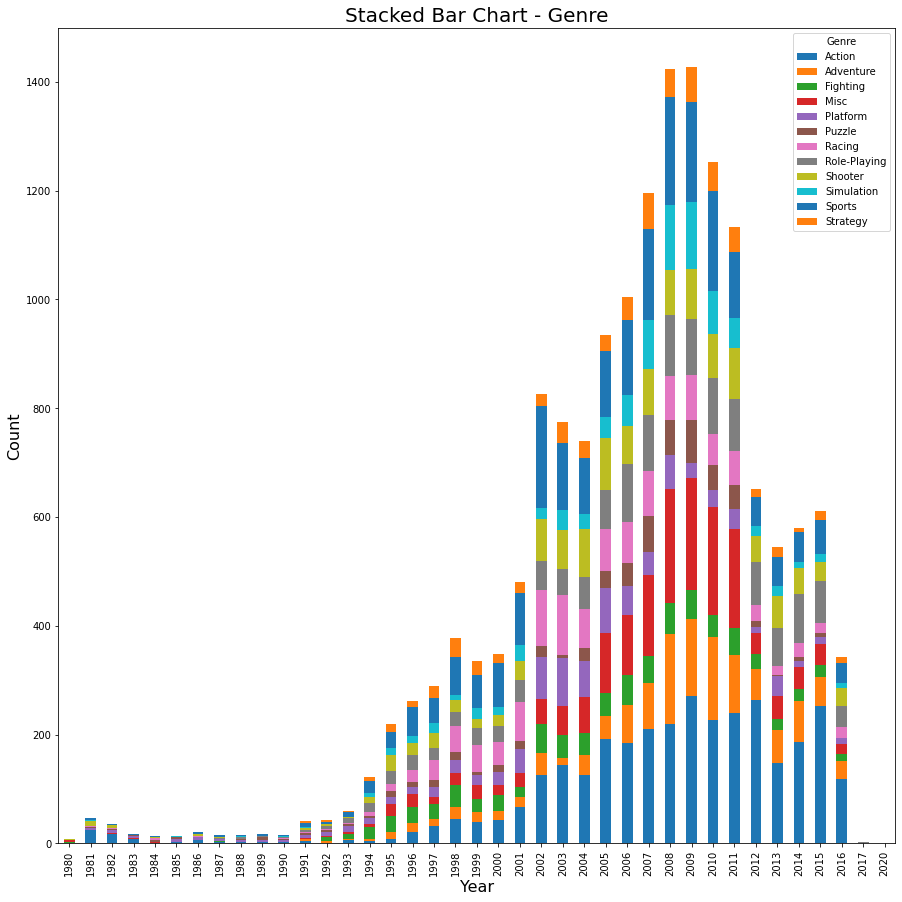

In [26]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 15)

count.plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart - Genre', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Year', fontsize = 16)

plt.show()

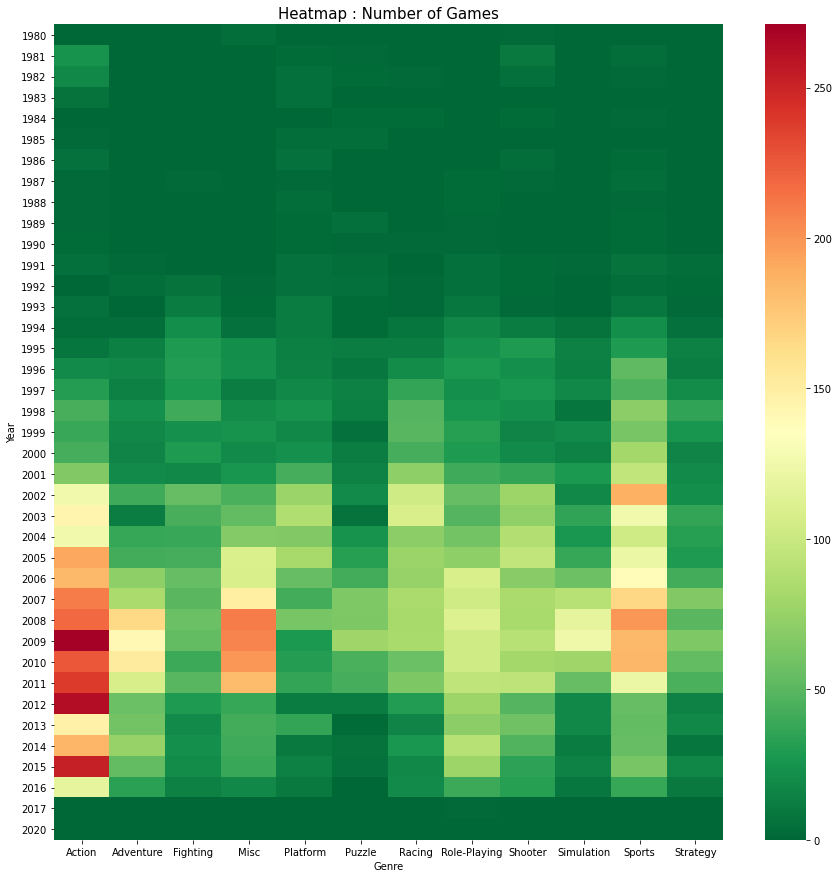

In [27]:
# 연도별 게임 트렌드 

ax = sns.heatmap(count, cmap='RdYlGn_r')
plt.rcParams["figure.figsize"] = (10, 10)
plt.title('Heatmap : Number of Games', fontsize = 15)
plt.ylabel('Year', fontsize = 10)
plt.xlabel('Genre', fontsize = 10)
plt.show()

In [28]:
# 2000년 이후 연도별 출시된 게임 장르별 갯수 

count_recent = count.reset_index()
count_recent = count_recent[count_recent['Year'] >= 2000]
count_recent = count_recent.set_index('Year')
count_recent

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2000,43.0,16.0,29.0,20.0,24.0,12.0,43.0,29.0,20.0,15.0,81.0,16.0
2001,66.0,20.0,18.0,26.0,43.0,15.0,71.0,41.0,36.0,28.0,96.0,20.0
2002,125.0,41.0,54.0,45.0,77.0,20.0,103.0,54.0,78.0,19.0,188.0,22.0
2003,144.0,12.0,44.0,53.0,87.0,7.0,109.0,48.0,73.0,35.0,125.0,37.0
2004,125.0,38.0,39.0,67.0,66.0,25.0,70.0,60.0,88.0,27.0,103.0,32.0
2005,192.0,42.0,43.0,110.0,82.0,32.0,77.0,71.0,96.0,38.0,122.0,29.0
2006,184.0,71.0,55.0,109.0,54.0,42.0,75.0,108.0,69.0,58.0,138.0,42.0
2007,210.0,84.0,50.0,150.0,42.0,65.0,84.0,103.0,84.0,90.0,167.0,66.0
2008,219.0,166.0,57.0,210.0,62.0,64.0,82.0,112.0,83.0,118.0,200.0,50.0


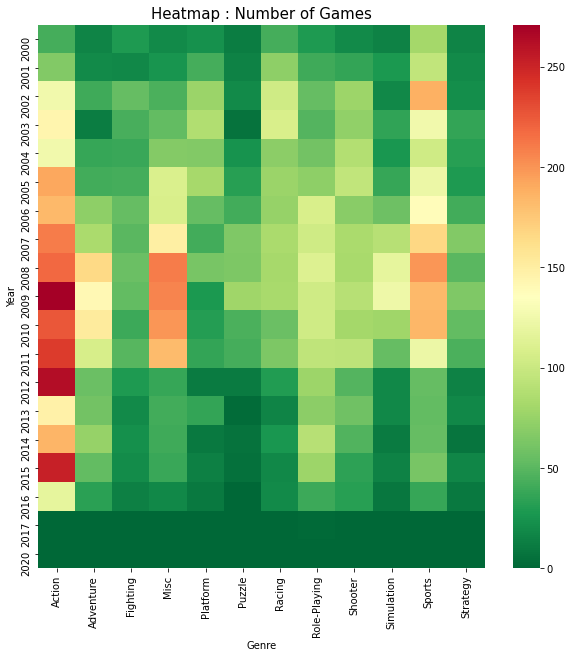

In [29]:
# 2000년 이후 연도별 게임 트렌드 

ax = sns.heatmap(count_recent, cmap='RdYlGn_r')
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Heatmap : Number of Games', fontsize = 15)
plt.ylabel('Year', fontsize = 10)
plt.xlabel('Genre', fontsize = 10)
plt.show()

# 매출이 높은 게임에 대한 분석

In [30]:
# 게임별 sales sum 열 추가
df['Sales_sum'] = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [31]:
# 수익 기준 상위 1%인 약 162개 게임 선정 

df_sort_sum_1percent = df.sort_values(by = "Sales_sum", ascending = False).head(162)
df_sort_sum_1percent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
6455,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8805,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
10664,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
883,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
10924,Forza Motorsport 3,X360,2009,Racing,Microsoft Game Studios,2.99,1.92,0.10,0.51,5.52
9288,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.51
2508,Super Mario Advance,GBA,2001,Platform,Nintendo,3.14,1.24,0.91,0.20,5.49
2475,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2.62,1.64,0.99,0.23,5.48


In [32]:
# 지역별 Sales 분포 유사한가?
dis_1percent = df_sort_sum_1percent[['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']].T
dis_1percent

,6455,129,8805,10664,883,200,6143,6412,10671,116,5489,5691,1786,7507,10246,11542,14301,4733,216,5939,6128,199,185,14702,3163,3531,12017,6046,2618,12725,12353,1396,15307,13844,14044,9980,12724,2778,8431,12023,...,14741,11366,13128,13660,153,2411,4791,3033,2059,10052,11892,3038,299,4525,1845,11311,12383,6335,2727,8704,1310,302,14330,9561,10080,7408,1491,870,6785,15271,179,9927,1664,8108,13029,10924,9288,2508,2475,2719
NA_Sales,41.49,29.08,15.85,15.75,11.27,23.20,11.38,14.03,14.59,26.93,9.07,9.81,9.00,8.94,9.09,14.97,7.01,9.43,12.78,4.75,6.42,10.83,9.54,9.63,8.41,6.06,5.57,3.44,6.85,9.03,9.67,5.89,5.77,4.99,8.25,8.52,5.54,6.99,6.75,5.98,...,0.79,3.25,2.55,2.64,3.74,4.98,2.57,3.64,2.55,4.34,3.70,4.01,2.47,0.07,3.11,3.92,4.05,3.54,2.45,2.63,3.18,4.47,2.41,2.80,0.66,3.66,1.88,2.26,3.13,2.49,2.97,2.54,2.95,3.28,2.70,2.99,0.47,3.14,2.62,3.21
EU_Sales,29.02,3.58,12.88,11.01,8.89,2.26,9.23,9.20,7.06,0.63,11.00,7.57,6.18,8.03,8.59,4.94,9.27,0.40,3.75,9.26,4.52,2.71,3.44,5.31,5.49,3.90,3.28,5.36,5.09,4.28,3.73,5.04,5.81,5.88,4.30,3.63,5.82,4.51,2.61,4.44,...,4.29,1.84,2.71,2.56,0.93,1.30,1.58,1.20,1.56,1.35,1.97,1.26,0.83,6.21,2.80,1.78,1.62,1.90,2.01,1.74,1.83,1.20,2.28,2.05,0.69,1.63,1.47,1.89,1.94,2.05,0.69,1.95,0.60,1.65,1.91,1.92,0.57,1.24,1.64,1.11
JP_Sales,3.77,6.81,3.79,3.28,10.22,4.22,6.50,2.93,4.70,0.28,1.93,4.13,7.20,3.60,2.53,0.24,0.97,0.41,3.54,4.16,6.04,4.18,3.84,0.06,0.47,5.38,5.65,5.32,1.87,0.13,0.11,3.12,0.35,0.65,0.07,0.08,0.49,0.30,2.66,0.48,...,0.05,1.03,0.25,0.16,1.69,0.08,2.06,1.49,1.29,0.06,0.09,0.87,2.87,0.00,0.02,0.03,0.07,0.07,0.87,0.83,0.78,0.16,0.28,0.17,4.35,0.00,2.02,1.36,0.07,0.16,1.81,0.21,1.97,0.07,0.11,0.10,4.13,0.91,0.99,0.95
Other_Sales,8.46,0.77,3.31,2.96,1.00,0.58,2.90,2.85,2.26,0.47,2.75,1.92,0.71,2.15,1.79,1.67,4.14,10.57,0.55,2.05,1.37,0.42,0.46,1.38,1.78,0.50,0.82,1.18,1.16,1.32,1.13,0.59,2.31,2.52,1.12,1.29,1.62,1.30,1.02,1.83,...,1.47,0.47,1.05,1.14,0.14,0.07,0.21,0.07,0.99,0.61,0.57,0.17,0.12,0.00,0.33,0.51,0.49,0.60,0.72,0.83,0.24,0.19,1.01,0.90,0.15,0.53,0.45,0.23,0.58,0.96,0.11,0.87,0.04,0.55,0.80,0.51,0.34,0.20,0.23,0.20


In [33]:
# 지역별 매출 총액 one-sample chi-square test

from scipy import stats
import numpy as np
from scipy.stats import chisquare

obs = np.array(dis_1percent.sum(axis=1))
chisquare(obs, axis = None)


# 귀무가설 : 상위 1% 게임의 지역별 매출 총액의 분포는 유사할 것이다. 
# 대안가설 : 상위 1% 게임의 지역별 매출 총액의 분포는 유사하지 않을 것이다. 
# pvalue=8.133121847188438e-151 이므로, 귀무가설 기각. 대안가설 채택. 

Power_divergenceResult(statistic=697.2872853104591, pvalue=8.133121847188438e-151)

In [34]:
#platform
percent1_platform = pd.DataFrame(df_sort_sum_1percent['Platform'].value_counts()).reset_index().rename(columns= {'index' : 'Platform','Platform' : 'Count'})
percent1_platform['count_sum'] = percent1_platform['Count'].sum()
percent1_platform['rate'] = percent1_platform.apply(lambda row: row['Count']/row['count_sum']*100, axis=1)
percent1_platform

,Platform,Count,count_sum,rate
0,X360,24,162,14.814815
1,PS3,23,162,14.197531
2,Wii,20,162,12.345679
3,DS,16,162,9.876543
4,PS,12,162,7.407407
5,PS2,11,162,6.790123
6,PS4,8,162,4.938272
7,GB,7,162,4.320988
8,NES,6,162,3.703704
9,3DS,6,162,3.703704


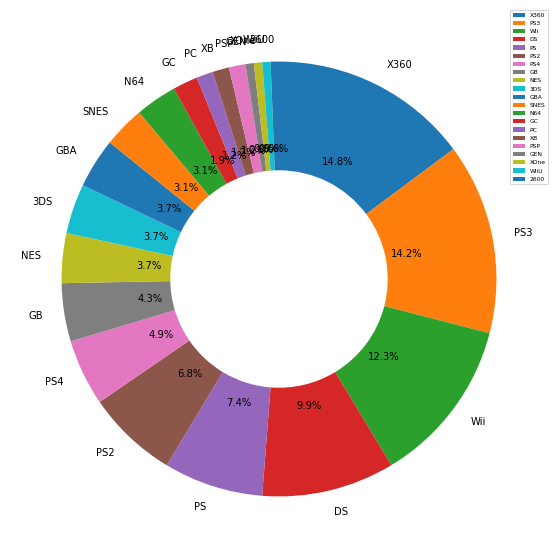

In [35]:
# 상위 1% 게임의 지원 플랫폼 비율 

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

label = list(np.array(percent1_platform['Platform']))
data = list(np.array(percent1_platform['rate']))


ax.pie(data,
       labels = label,
       startangle = 90,
       counterclock = False, 
       autopct='%0.1f%%',
       wedgeprops=dict(width=0.5))
ax.legend(label, fontsize = 6)
plt.show()

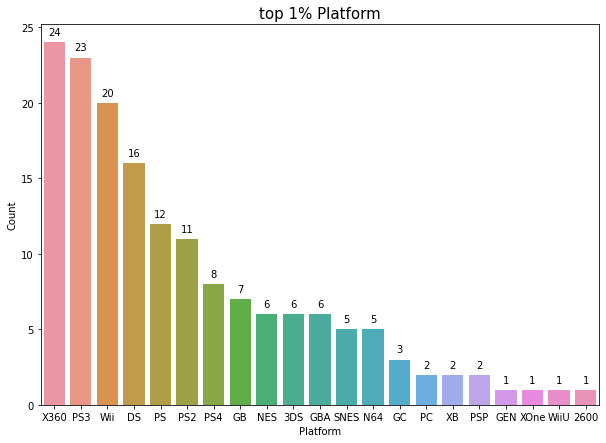

In [36]:
# 상위 1% 게임의 지원 플랫폼 갯수  

plt.figure(figsize = (10, 7))

p = sns.barplot(x = 'Platform', y = 'Count', data = percent1_platform)
for i in p.patches:
  p.annotate(format("%.0f" % i.get_height()), (i.get_x() + i.get_width()/ 2., i.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  
plt.title('top 1% Platform', fontsize = 15)
plt.ylabel('Count', fontsize = 10)
plt.xlabel('Platform', fontsize = 10)
plt.show()


In [37]:
# 상위 1% 게임 플랫폼별 총 매출 

percent1_platform_sales = df_sort_sum_1percent[['Platform', 'Sales_sum']]
percent1_platform_sales = percent1_platform_sales.groupby('Platform').sum().reset_index()
percent1_platform_sales

,Platform,Sales_sum
0,2600,7.81
1,3DS,60.70
2,DS,225.42
3,GB,135.08
4,GBA,49.19
5,GC,20.32
6,GEN,6.02
7,N64,43.02
8,NES,105.37
9,PC,14.39


Text(0.5, 1.0, 'Sales Sum by Platform')

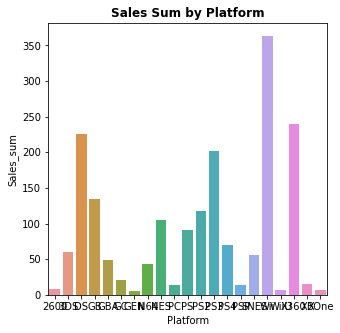

In [38]:
sns.barplot(data = percent1_platform_sales,
            x = 'Platform',
            y = 'Sales_sum')
plt.title('Sales Sum by Platform', fontweight = 'bold')

In [39]:
# 상위 1% 게임 플랫폼별 매출 평균

percent1_platform_mean = pd.merge(percent1_platform, percent1_platform_sales)

percent1_platform_mean['mean'] = percent1_platform_mean.apply(lambda row: row['Sales_sum']/row['Count'], axis=1)

percent1_platform_mean

,Platform,Count,count_sum,rate,Sales_sum,mean
0,X360,24,162,14.814815,239.06,9.960833
1,PS3,23,162,14.197531,201.27,8.750870
2,Wii,20,162,12.345679,363.15,18.157500
3,DS,16,162,9.876543,225.42,14.088750
4,PS,12,162,7.407407,90.57,7.547500
5,PS2,11,162,6.790123,118.11,10.737273
6,PS4,8,162,4.938272,69.22,8.652500
7,GB,7,162,4.320988,135.08,19.297143
8,NES,6,162,3.703704,105.37,17.561667
9,3DS,6,162,3.703704,60.70,10.116667


Text(0.5, 1.0, 'Sales Mean by Platform')

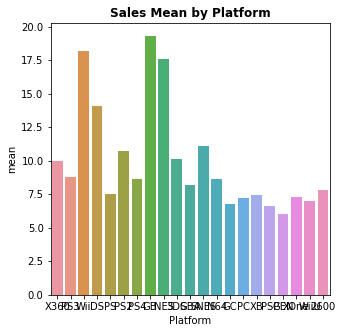

In [40]:
sns.barplot(data = percent1_platform_mean,
            x = 'Platform',
            y = 'mean')
plt.title('Sales Mean by Platform', fontweight = 'bold')

In [41]:
# 연도별 플랫폼 카운트 

year_platform  = df_sort_sum_1percent[['Platform', 'Year', 'Sales_sum']]
year_platform = year_platform.groupby(['Year','Platform'], as_index = False)['Sales_sum'].count()
year_platform = year_platform.rename(columns = {'Sales_sum' : 'Count'})
year_platform 

,Year,Platform,Count
0,1982,2600,1
1,1984,NES,1
2,1985,NES,1
3,1986,NES,1
4,1988,NES,3
...,...,...,...
72,2014,3DS,2
73,2014,PS4,4
74,2014,WiiU,1
75,2015,PS4,4


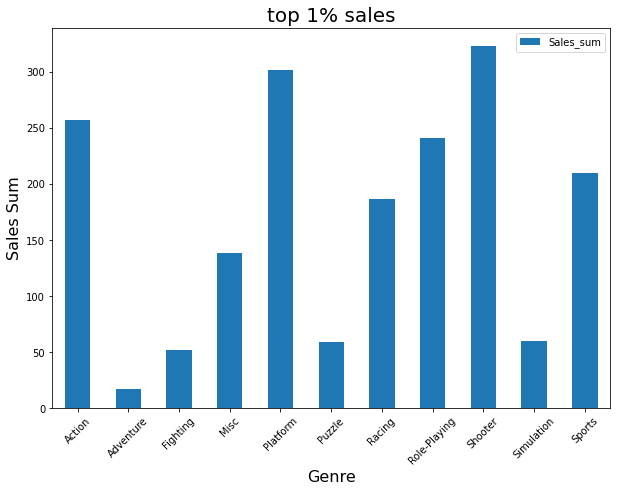

In [42]:
# 1% 매출 게임의 장르별 sales sum

df_genre_sales_sum = df_sort_sum_1percent[['Genre', 'Sales_sum']].groupby('Genre').sum()

plt.rcParams["figure.figsize"] = (10, 7)

df_genre_sales_sum.plot(kind = 'bar')

plt.title('top 1% sales', fontsize = 20)
plt.ylabel('Sales Sum', fontsize = 16)
plt.xlabel('Genre', fontsize = 16)
plt.xticks(rotation = 45)

plt.show()

In [43]:
# 상위 1% 게임 장르별 갯수 

df_sales_genre_count = df_sort_sum_1percent[['Genre', 'Sales_sum']].groupby('Genre').count()
df_sales_genre_count

,Sales_sum
Genre,
Action,28
Adventure,2
Fighting,7
Misc,11
Platform,24
Puzzle,4
Racing,16
Role-Playing,22
Shooter,32


In [44]:
df_genre_sales_sum.reset_index()

,Genre,Sales_sum
0,Action,256.78
1,Adventure,16.73
2,Fighting,52.31
3,Misc,138.33
4,Platform,301.69
5,Puzzle,58.95
6,Racing,186.95
7,Role-Playing,241.45
8,Shooter,323.23
9,Simulation,59.96


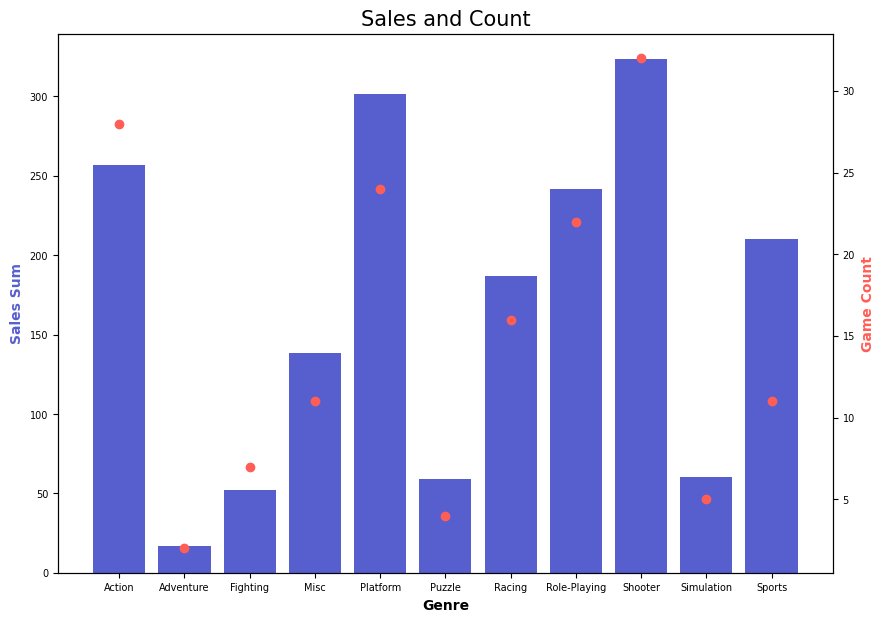

In [46]:
# 매출 상위 1% 게임 장르별 수와 총 매출 
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 7

x = df_genre_sales_sum.reset_index()['Genre']
y1 = df_genre_sales_sum['Sales_sum']
y2 = df_sales_genre_count['Sales_sum']

fig, ax1 = plt.subplots()

ax1.bar(x, y1, color = '#575fcf')
ax1.set_xlabel('Genre', fontsize = 10, fontweight = 'bold')
ax1.set_ylabel('Sales Sum', fontsize = 10, fontweight = 'bold', color = '#575fcf')

ax2 = ax1.twinx()
ax2.scatter(x, y2, color = '#ff5e57')
ax2.set_ylabel('Game Count', fontsize = 10, fontweight = 'bold', color = '#ff5e57')

plt.title('Sales and Count', fontsize = 15)

plt.show()

In [47]:
# 장르별 게임당 수익 평균 

for_merge_gs = df_genre_sales_sum.reset_index()
for_merge_gc = df_sales_genre_count.reset_index().rename(columns = {'Sales_sum' : 'Count'})

merge_genre = pd.merge(for_merge_gs, for_merge_gc)
merge_genre['Sales Mean'] = merge_genre.apply(lambda row : row['Sales_sum']/row['Count'], axis = 1)

In [48]:
merge_genre = merge_genre.rename(columns = {'rate' : 'Sales_Mean'})
merge_genre

,Genre,Sales_sum,Count,Sales Mean
0,Action,256.78,28,9.170714
1,Adventure,16.73,2,8.365000
2,Fighting,52.31,7,7.472857
3,Misc,138.33,11,12.575455
4,Platform,301.69,24,12.570417
5,Puzzle,58.95,4,14.737500
6,Racing,186.95,16,11.684375
7,Role-Playing,241.45,22,10.975000
8,Shooter,323.23,32,10.100938
9,Simulation,59.96,5,11.992000


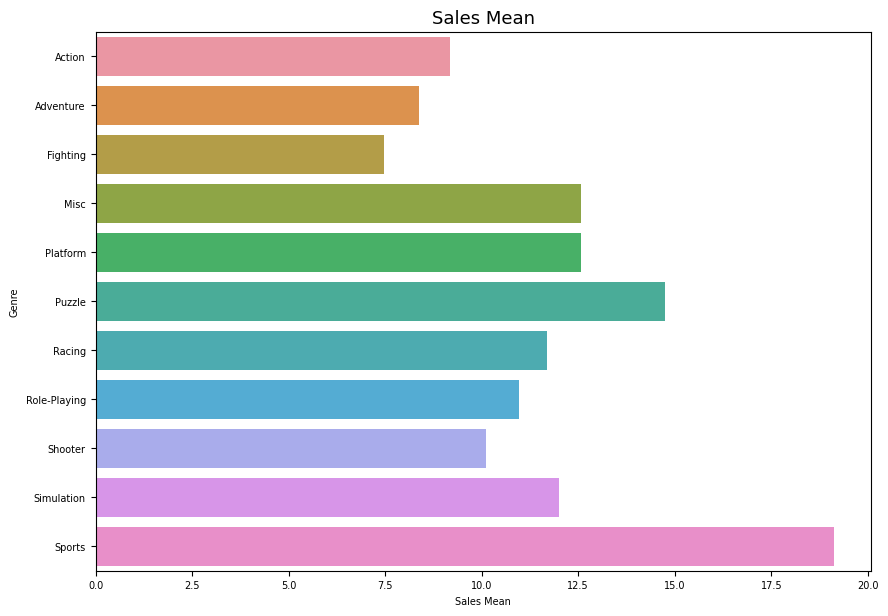

In [49]:
sns.barplot(y = 'Genre', x = 'Sales Mean', data = merge_genre)
plt.title('Sales Mean', fontsize = 13);

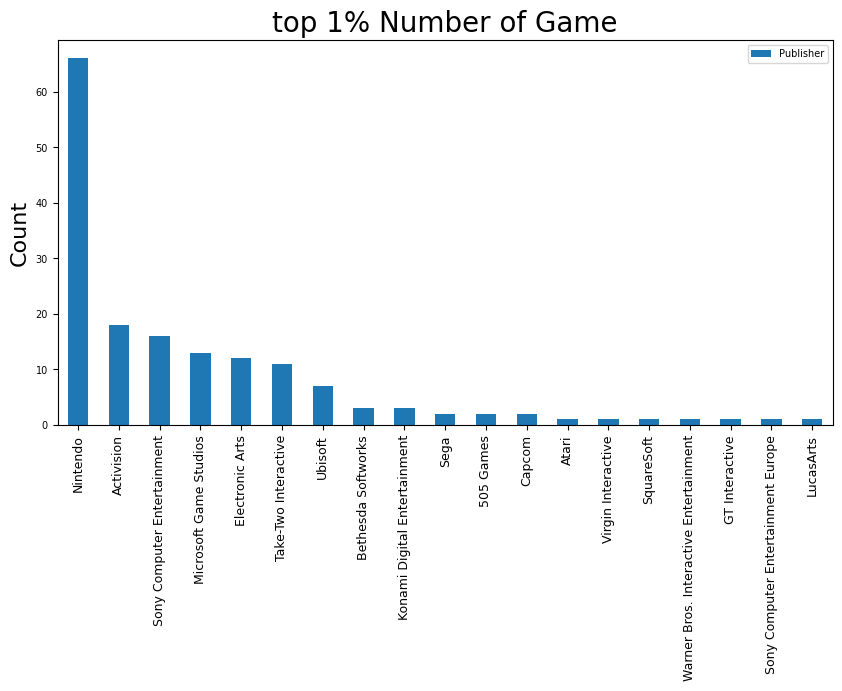

In [106]:
# 매출 상위 1% 게임의 제작 회사별 게임 개수

df_publisher_count = pd.DataFrame(df_sort_sum_1percent['Publisher'].value_counts())

plt.rcParams["figure.figsize"] = (10, 5)

df_publisher_count.plot(kind = 'bar')

plt.title('top 1% Number of Game', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 9)

plt.show()

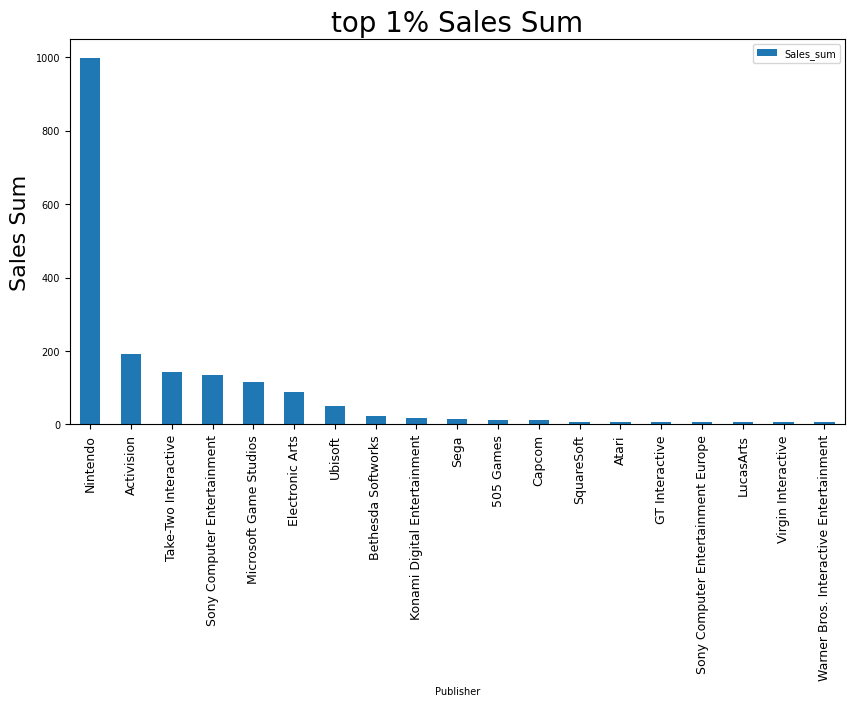

In [107]:
# 매출 상위 1% 게임의 제작 회사별 수익 

df_publisher_sales = df_sort_sum_1percent[['Publisher', 'Sales_sum']].groupby('Publisher').sum()
df_publisher_sales = df_publisher_sales.sort_values(by = ['Sales_sum'], axis = 0, ascending = False)

plt.rcParams["figure.figsize"] = (10, 5)

df_publisher_sales.plot(kind = 'bar')

plt.title('top 1% Sales Sum', fontsize = 20)
plt.ylabel('Sales Sum', fontsize = 16)
plt.xticks(fontsize = 9)

plt.show()

In [52]:
# 게임 회사별 게임당 수익 

df_publisher_sal = df_publisher_sales.reset_index()
df_publisher_cou = df_publisher_count.reset_index().rename(columns = {'index' : 'Publisher', 'Publisher' : 'Count'})

merge = pd.merge(df_publisher_sal, df_publisher_cou)
merge['rate'] = merge.apply(lambda row: row['Sales_sum']/row['Count'], axis=1)
merge

,Publisher,Sales_sum,Count,rate
0,Nintendo,998.08,66,15.122424
1,Activision,191.88,18,10.660000
2,Take-Two Interactive,142.08,11,12.916364
3,Sony Computer Entertainment,135.90,16,8.493750
4,Microsoft Game Studios,114.93,13,8.840769
5,Electronic Arts,88.22,12,7.351667
6,Ubisoft,51.59,7,7.370000
7,Bethesda Softworks,22.36,3,7.453333
8,Konami Digital Entertainment,18.11,3,6.036667
9,Sega,14.07,2,7.035000


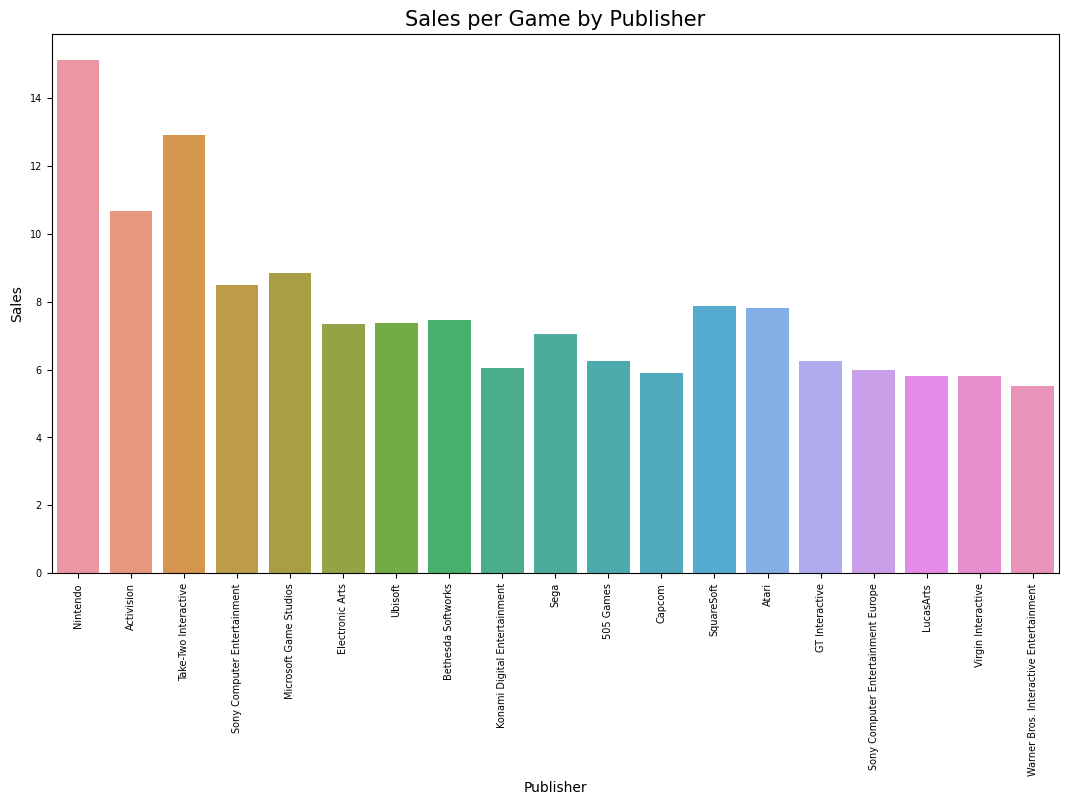

In [53]:
# 게임 회사별 게임당 수익 

plt.figure(figsize = (13, 7))
sns.barplot(x = 'Publisher', y = 'rate', data = merge)

plt.title('Sales per Game by Publisher', fontsize = 15)
plt.ylabel('Sales', fontsize = 10)
plt.xlabel('Publisher', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [54]:
# 1% 게임의 출시연도 분포 
top_game_year = df_sort_sum_1percent[['Name', 'Year']]
top_game_year = pd.DataFrame(top_game_year.groupby('Year')['Name'].count()).reset_index().rename(columns = {'Name' : 'Count'})
top_game_year

,Year,Count
0,1982,1
1,1984,1
2,1985,1
3,1986,1
4,1988,3
5,1989,2
6,1990,1
7,1992,4
8,1993,1
9,1994,1


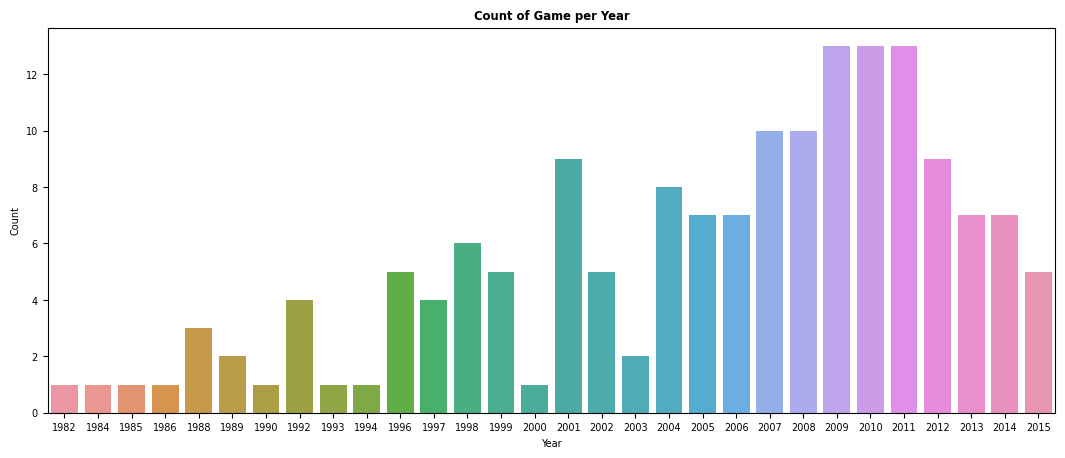

In [56]:
plt.figure(figsize = (13, 5))
sns.barplot(x = 'Year', y = 'Count',  data = top_game_year)
plt.title('Count of Game per Year', fontweight = 'bold')
plt.show()

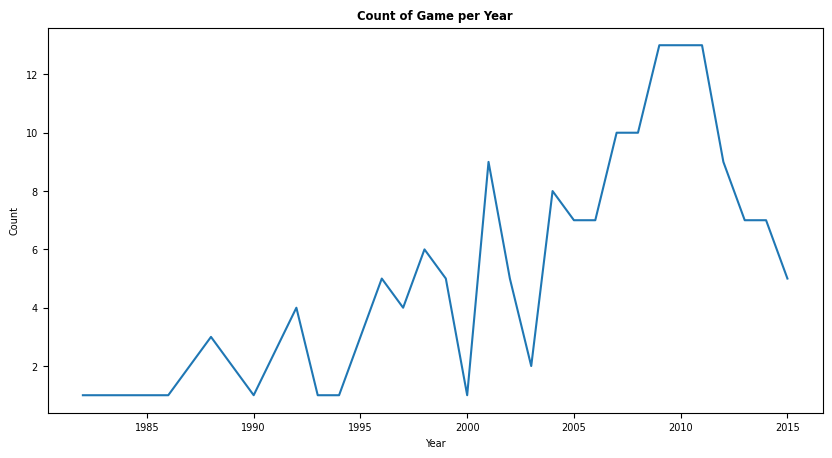

In [58]:
sns.lineplot(x = 'Year', y = 'Count', data = top_game_year)
plt.title('Count of Game per Year', fontweight = 'bold')
plt.show()

In [59]:
# 상위 1% 게임에 대한 총매출 비율 
df_sort_sum_1percent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
6455,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8805,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
10664,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
883,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
10924,Forza Motorsport 3,X360,2009,Racing,Microsoft Game Studios,2.99,1.92,0.10,0.51,5.52
9288,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.51
2508,Super Mario Advance,GBA,2001,Platform,Nintendo,3.14,1.24,0.91,0.20,5.49
2475,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2.62,1.64,0.99,0.23,5.48


In [60]:
rate_sales = pd.DataFrame(df_sort_sum_1percent[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()).reset_index().rename(columns = {'index' : 'Region', 0 :'Sales_Sum'})
rate_sales

,Region,Sales_Sum
0,NA_Sales,887.78
1,EU_Sales,546.17
2,JP_Sales,243.78
3,Other_Sales,168.89


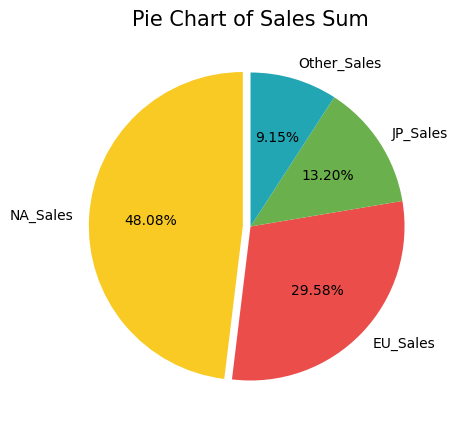

In [61]:
color = ['#f9ca24', '#eb4d4b', '#6ab04c', '#22a6b3']
explodes = (0.05, 0, 0, 0)

plt.pie(rate_sales['Sales_Sum'],
        explode = explodes,
        labels = rate_sales['Region'],
        autopct='%1.2f%%',
        colors = color,
        startangle=90,
        textprops={'fontsize': 10})

plt.title('Pie Chart of Sales Sum', fontsize=15)

plt.show()


# Action vs Sports

In [87]:
# sports 장르 데이터 
sports = df[df['Genre'] == 'Sports']
sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
22,RealSports Football,2600,1981,Sports,Atari,0.24,0.01,0.00,0.00,0.25
29,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,0.13
31,RealSports Baseball,2600,1981,Sports,Atari,0.20,0.01,0.00,0.00,0.21
49,International Soccer,2600,1981,Sports,Mattel Interactive,0.18,0.01,0.00,0.00,0.19
62,RealSports Tennis,2600,1982,Sports,Atari,0.46,0.03,0.00,0.01,0.50
...,...,...,...,...,...,...,...,...,...,...
16208,Rugby Challenge 3,PS4,2016,Sports,Alternative Software,0.00,0.03,0.00,0.01,0.04
16216,Jikkyou Powerful Pro Baseball 2016,PSV,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.17,0.00,0.17
16222,Pro Cycling Manager 2016,PS4,2016,Sports,Focus Home Interactive,0.00,0.04,0.00,0.01,0.05
16232,FIFA 17,PC,2016,Sports,Electronic Arts,0.00,0.05,0.00,0.00,0.05


(0.0, 400.0)

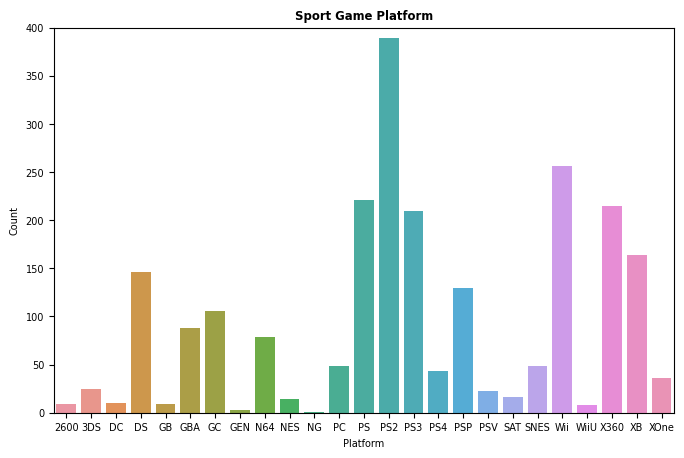

In [88]:
# sports 게임의 플랫폼 데이터 
sns.barplot(x = 'Platform', y = 'Name',
            data = pd.DataFrame(sports.groupby('Platform')['Name'].count()).reset_index())
plt.title('Sport Game Platform', fontweight = 'bold')

plt.ylabel('Count')
plt.ylim(0, 400)

In [89]:
# Sports NA JP chi2
from scipy.stats import chi2_contingency

obs1 = pd.crosstab(sports['NA_Sales'], sports['JP_Sales'])
chi2_contingency(obs1, correction = False)

# 귀무가설 : Sports 장르의 북미와 일본 매출은 연관이 없다.
# 기각 -> 두 지역의 매출은 연관이 있다. 

(26008.752572241905,
 0.0,
 16920,
 array([[3.61384080e+02, 1.31335363e+01, 8.26141801e+00, ...,
         2.11831231e-01, 2.11831231e-01, 2.11831231e-01],
        [3.78451501e+01, 1.37538060e+00, 8.65158765e-01, ...,
         2.21835581e-02, 2.21835581e-02, 2.21835581e-02],
        [6.01070030e+01, 2.18442801e+00, 1.37407569e+00, ...,
         3.52327099e-02, 3.52327099e-02, 3.52327099e-02],
        ...,
        [7.42061766e-01, 2.69682471e-02, 1.69638973e-02, ...,
         4.34971727e-04, 4.34971727e-04, 4.34971727e-04],
        [7.42061766e-01, 2.69682471e-02, 1.69638973e-02, ...,
         4.34971727e-04, 4.34971727e-04, 4.34971727e-04],
        [7.42061766e-01, 2.69682471e-02, 1.69638973e-02, ...,
         4.34971727e-04, 4.34971727e-04, 4.34971727e-04]]))

In [90]:
# action 장르 데이터 
action = df[df['Genre'] == 'Action']
action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
8,King Kong,2600,1981,Action,Tigervision,0.65,0.04,0.00,0.01,0.70
9,Fireball,2600,1981,Action,Starpath Corp.,0.30,0.02,0.00,0.00,0.32
11,Armor Ambush,2600,1981,Action,Mattel Interactive,0.15,0.01,0.00,0.00,0.16
12,Fast Food,2600,1981,Action,Unknown,0.27,0.02,0.00,0.00,0.29
...,...,...,...,...,...,...,...,...,...,...
16226,Aegis of Earth: Protonovus Assault,PSV,2016,Action,PQube,0.02,0.01,0.00,0.01,0.04
16229,Hitman (2016),XOne,2016,Action,Square Enix,0.00,0.01,0.00,0.00,0.01
16231,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016,Action,Square Enix,0.00,0.00,0.28,0.00,0.28
16234,Dynasty Warriors: Eiketsuden,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01


(0.0, 400.0)

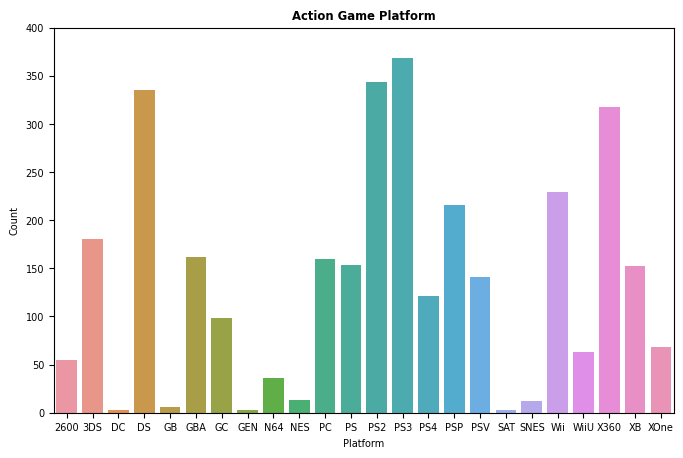

In [91]:
# action 게임의 플랫폼 데이터 
sns.barplot(x = 'Platform', y = 'Name',
            data = pd.DataFrame(action.groupby('Platform')['Name'].count()).reset_index())
plt.title('Action Game Platform', fontweight = 'bold')

plt.ylabel('Count')
plt.ylim(0, 400)

In [92]:
# Action NA JP chi2

obs2 = pd.crosstab(action['NA_Sales'], action['JP_Sales'])
chi2_contingency(obs2, correction = False)

# 귀무가설 : Action 장르의 북미와 일본 매출은 연관이 없다.
# 기각 -> 두 지역의 매출은 연관이 있다. 

(79240.50554554875,
 0.0,
 19929,
 array([[4.66577778e+02, 3.37419753e+01, 3.55296296e+01, ...,
         2.23456790e-01, 2.23456790e-01, 2.23456790e-01],
        [5.28444444e+01, 3.82160494e+00, 4.02407407e+00, ...,
         2.53086420e-02, 2.53086420e-02, 2.53086420e-02],
        [6.83111111e+01, 4.94012346e+00, 5.20185185e+00, ...,
         3.27160494e-02, 3.27160494e-02, 3.27160494e-02],
        ...,
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04],
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04],
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04]]))

In [93]:
# Action NA JP chi2

obs4 = pd.crosstab(action['NA_Sales']*1000, action['JP_Sales']*1000)
chi2_contingency(obs4, correction = False)

# 귀무가설 : Action 장르의 북미와 일본 매출은 연관이 없다.
# 기각 -> 두 지역의 매출은 연관이 있다. 

(79240.50554554875,
 0.0,
 19929,
 array([[4.66577778e+02, 3.37419753e+01, 3.55296296e+01, ...,
         2.23456790e-01, 2.23456790e-01, 2.23456790e-01],
        [5.28444444e+01, 3.82160494e+00, 4.02407407e+00, ...,
         2.53086420e-02, 2.53086420e-02, 2.53086420e-02],
        [6.83111111e+01, 4.94012346e+00, 5.20185185e+00, ...,
         3.27160494e-02, 3.27160494e-02, 3.27160494e-02],
        ...,
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04],
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04],
        [6.44444444e-01, 4.66049383e-02, 4.90740741e-02, ...,
         3.08641975e-04, 3.08641975e-04, 3.08641975e-04]]))

In [94]:
# sports & action 데이터 
sports_action = pd.concat([sports, action])
sports_action['Sales_sum'] = sports_action[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
sports_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
22,RealSports Football,2600,1981,Sports,Atari,0.24,0.01,0.00,0.00,0.25
29,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,0.13
31,RealSports Baseball,2600,1981,Sports,Atari,0.20,0.01,0.00,0.00,0.21
49,International Soccer,2600,1981,Sports,Mattel Interactive,0.18,0.01,0.00,0.00,0.19
62,RealSports Tennis,2600,1982,Sports,Atari,0.46,0.03,0.00,0.01,0.50
...,...,...,...,...,...,...,...,...,...,...
16226,Aegis of Earth: Protonovus Assault,PSV,2016,Action,PQube,0.02,0.01,0.00,0.01,0.04
16229,Hitman (2016),XOne,2016,Action,Square Enix,0.00,0.01,0.00,0.00,0.01
16231,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016,Action,Square Enix,0.00,0.00,0.28,0.00,0.28
16234,Dynasty Warriors: Eiketsuden,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01


In [95]:
# 연도별 action, sports 게임 수 
sa_year_sales = sports_action.groupby(['Genre', 'Year'], as_index = False)['Sales_sum'].count()
sa_year_sales

,Genre,Year,Sales_sum
0,Action,1980,1
1,Action,1981,25
2,Action,1982,18
3,Action,1983,7
4,Action,1984,1
...,...,...,...
69,Sports,2012,54
70,Sports,2013,53
71,Sports,2014,55
72,Sports,2015,62


Text(0.5, 1.0, 'Count of Sports & Action Game')

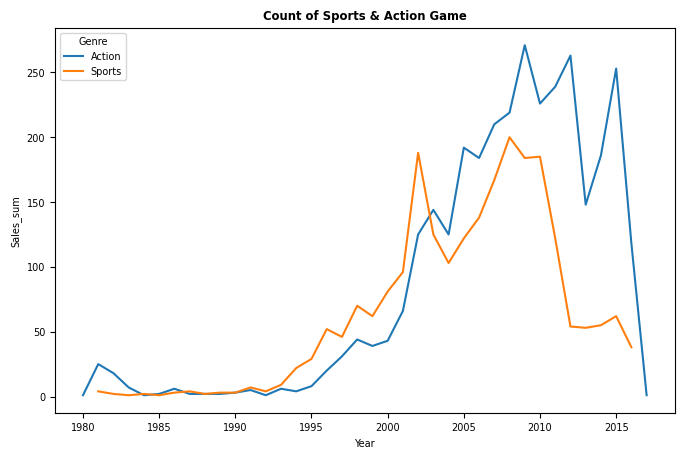

In [96]:
# 연도별 출시 게임 수 추세 
sns.lineplot(data = sa_year_sales, x = 'Year', y = 'Sales_sum', hue = 'Genre')
plt.title('Count of Sports & Action Game', fontweight = 'bold')

In [97]:
# 연도별 action, sports 게임 매출 총액 
sa_year_sales_sum = sports_action.groupby(['Genre', 'Year'], as_index = False)['Sales_sum'].sum()
sa_year_sales_sum

,Genre,Year,Sales_sum
0,Action,1980,0.34
1,Action,1981,14.79
2,Action,1982,6.50
3,Action,1983,2.86
4,Action,1984,1.85
...,...,...,...
69,Sports,2012,30.90
70,Sports,2013,41.54
71,Sports,2014,46.64
72,Sports,2015,41.49


In [98]:
# 수익률 
sa_rate = sa_year_sales, sa_year_sales_sum

In [99]:
# 장르 매출 총액 / 게임 수 : 게임당 매출 평균 
print("Action: ", sa_year_sales_sum[sa_year_sales_sum['Genre'] =='Action']['Sales_sum'].sum()/3240) 
print("Sports: ",sa_year_sales_sum[sa_year_sales_sum['Genre'] =='Sports']['Sales_sum'].sum()/2299)   

Action:  0.5286975308641976
Sports:  0.5677859939103959


In [100]:
# sports와 action 매출 평균 비교 

from scipy import stats

test_sport = sa_year_sales_sum[sa_year_sales_sum['Genre'] =='Sports']['Sales_sum']
test_action = sa_year_sales_sum[sa_year_sales_sum['Genre'] =='Action']['Sales_sum']

stats.ttest_ind(test_sport,test_action)

# 귀무가설 : sports와 action 게임 매출의 평균은 통계적으로 차이가 없다.
# pvalue=0.38158948183632047이므로, 귀무가설 채택.

Ttest_indResult(statistic=-0.8803673844178626, pvalue=0.38158948183632047)

In [101]:
np.array(sports[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum())


array([667.26, 370.97, 134.76, 132.35])

In [102]:
action[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

NA_Sales       858.75
EU_Sales       513.64
JP_Sales       156.60
Other_Sales    183.99
dtype: float64

Text(0.5, 1.0, 'Count of Sports & Action Game')

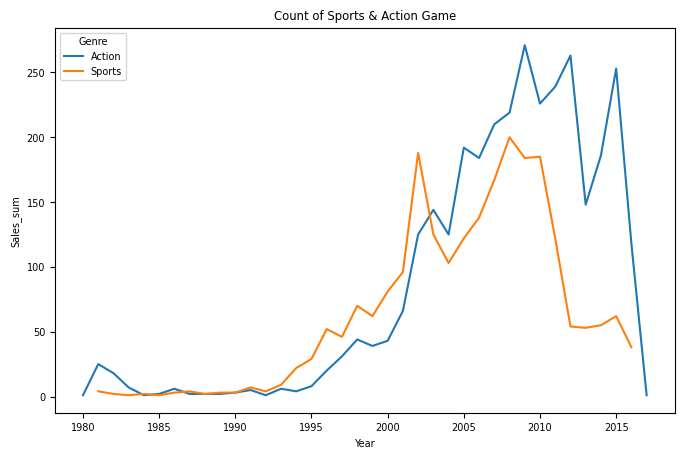

In [103]:
# 연도별 출시 게임 추세 
sns.lineplot(data = sa_year_sales, x = 'Year', y = 'Sales_sum', hue = 'Genre')
plt.title('Count of Sports & Action Game')

In [113]:
# 2000년 이후 출시된 action 게임 지원 플랫폼 수 

action_platform = action[['Platform', 'Genre', 'Year']]
action_platform = action_platform.groupby(['Year', 'Platform'])['Genre'].count().unstack('Platform').fillna(0)
action_platform = action_platform .reset_index()
action_platform = action_platform[action_platform['Year'] >= 2000]
action_platform = action_platform.set_index('Year')
action_platform

Platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,26.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,1.0,0.0,2.0,17.0,1.0,0.0,1.0,0.0,1.0,18.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,38.0,16.0,0.0,0.0,0.0,4.0,5.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,34.0,29.0,0.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
2004,0.0,0.0,0.0,1.0,0.0,33.0,17.0,0.0,0.0,0.0,1.0,0.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0
2005,0.0,0.0,0.0,18.0,0.0,28.0,22.0,0.0,0.0,0.0,4.0,0.0,61.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,45.0,0.0
2006,0.0,0.0,0.0,40.0,0.0,10.0,11.0,0.0,0.0,0.0,6.0,0.0,47.0,3.0,0.0,26.0,0.0,0.0,0.0,9.0,0.0,19.0,13.0,0.0
2007,0.0,0.0,0.0,54.0,0.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,31.0,20.0,0.0,28.0,0.0,0.0,0.0,39.0,0.0,28.0,1.0,0.0
2008,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,30.0,30.0,0.0,14.0,0.0,0.0,0.0,38.0,0.0,35.0,0.0,0.0


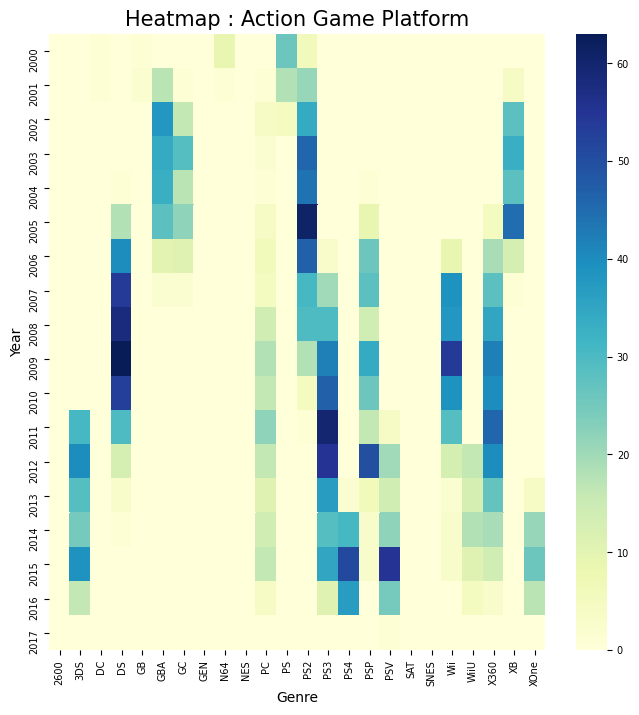

In [128]:
ax = sns.heatmap(action_platform, cmap='YlGnBu')
plt.rcParams["figure.figsize"] = (8, 8)
plt.title('Heatmap : Action Game Platform', fontsize = 15)
plt.ylabel('Year', fontsize = 10)
plt.xlabel('Genre', fontsize = 10)
plt.show()